# **SQL para Data Science**

#### **O que é SQL?**
* Um Banco de Dados é uma estrutura arquitetada para armazenar e manipular dados (inclusive para grandes volumes de dados), de modo que as tabelas podem ou não se relacionar. 
* Como o SQL pode ser útil para Cientista de Dados/Analista de Dados?
    * Geralmente os dados em um banco relacional serão o principal insumo para a criação de dashboard e projetos de Data Science (podemos fazer consultas e trazer os dados para o Pandas, e então limpar e analisar os dados, gerar visualizações e construir modelos de Machine Learning.
* SQL (Structured Query Language ou Linguagem de Consulta Estrutura) é a linguagem padrão para administrar e consultar banco de dados relacional.
* Neste sentido, o Cientista de Dados precisa construir consultas (query) sólidas e eficientes para acessar os dados da empresa em que estiver inserido, para então criar projetos de Data Science.

#### **Subconjuntos do SQL**
Podemos dividir a linguagem SQl de acordo com as operações realizadas no banco de dados, vejamos os principais comandos:

* DML - Linguagem de Manipulação de Dados
    * INSERT (inserção de um registro)
    * UPDATE (atualização de valores)
    * DELETE (remoção de linhas)
* DDL - Linguagem de Definição de Dados
    * CREATE (criar objetos no banco de dados, tabela por exemplo)
    * DROP (apagar objetos no banco de dados, tabela por exemplo)
    * ALTER (alterar um objeto no banco de dados, adicionar uma coluna em uma tabela)
* DCL - Linguagem de Controle de Dados
    * GRANT (autoriza o usuário a realizar operações)
    * REVOKE (remove/restringe as operações que um usuário pode realizar)
* DTL - Linguagem de Transação de Dados
    * COMMIT (finaliza uma transação)
    * ROLLBACK (descarta mudanças desde o último COMMIT ou ROLLBACK)
* DQL - Linguagem de Consulta de Dados
    * SELECT (realiza consultas aos dados de um banco de dados)

Resumindo, podemos dizer que os principais comandos são:
* SELECT
* INSERT
* UPDATE
* DELETE

#### **Alguns Sistemas de Banco de Dados que usam SQL)**
* MySQL
* PostgreSQL
* SQLite
* Oracle
* SQL Server

#### **Hands On!**

In [1]:
# imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from utils import *
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', 140)

In [2]:
# gera dados sintéticos
df = gerar_dados(100)

In [3]:
df.head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,1,Ilhéus,Não Informado,34,9845,Ensino Fundamental,2.51,Advogado,21
1,2,Lauro de Freitas,Feminino,20,5532,Ensino Fundamental,2.86,Bancário,2
2,3,Feira de Santana,Masculino,52,5741,Ensino Médio,9.24,Físico,6
3,4,Salvador,Masculino,30,3269,Ensino Médio,3.06,Bancário,3
4,5,Ilhéus,Não Informado,28,7127,Ensino Médio,5.68,Contador,10


In [4]:
# estatística descritiva dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50,29.01,1.00,25.75,50.5,75.25,100.00
idade,100.0,41.61,12.45,18.00,32.75,42.5,51.00,64.00
renda,100.0,5987.50,2440.21,1251.00,3928.75,6377.0,7993.50,9845.00
score,100.0,4.69,2.87,0.14,2.16,4.4,7.17,9.81
tempo_empregado,100.0,14.54,8.88,1.00,6.00,15.0,22.00,29.00


In [5]:
# informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               100 non-null    int64  
 1   cidade           100 non-null    object 
 2   sexo             100 non-null    object 
 3   idade            100 non-null    int64  
 4   renda            100 non-null    int64  
 5   escolaridade     100 non-null    object 
 6   score            100 non-null    float64
 7   profissao        100 non-null    object 
 8   tempo_empregado  100 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 7.2+ KB


Como poderíamos fazer consultas neste DataFrame usando apenas Pandas? Vamos ver a seguir algumas possibilidades de filtros, a partir de 3 formas distintas.

* Seleciona apenas os clientes do sexo masculino;

In [6]:
df[df.sexo == 'Masculino'].head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
2,3,Feira de Santana,Masculino,52,5741,Ensino Médio,9.24,Físico,6
3,4,Salvador,Masculino,30,3269,Ensino Médio,3.06,Bancário,3
5,6,Porto Seguro,Masculino,33,5436,Ensino Médio,3.68,Economista,15
12,13,Itabuna,Masculino,29,7957,Ensino Superior,7.64,Economista,4
15,16,Salvador,Masculino,25,6676,Ensino Médio,2.21,Físico,26


In [7]:
df.loc[(df.sexo == 'Masculino')].head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
2,3,Feira de Santana,Masculino,52,5741,Ensino Médio,9.24,Físico,6
3,4,Salvador,Masculino,30,3269,Ensino Médio,3.06,Bancário,3
5,6,Porto Seguro,Masculino,33,5436,Ensino Médio,3.68,Economista,15
12,13,Itabuna,Masculino,29,7957,Ensino Superior,7.64,Economista,4
15,16,Salvador,Masculino,25,6676,Ensino Médio,2.21,Físico,26


In [8]:
df.query("sexo == 'Masculino'").head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
2,3,Feira de Santana,Masculino,52,5741,Ensino Médio,9.24,Físico,6
3,4,Salvador,Masculino,30,3269,Ensino Médio,3.06,Bancário,3
5,6,Porto Seguro,Masculino,33,5436,Ensino Médio,3.68,Economista,15
12,13,Itabuna,Masculino,29,7957,Ensino Superior,7.64,Economista,4
15,16,Salvador,Masculino,25,6676,Ensino Médio,2.21,Físico,26


* Seleciona os clientes com Ensino Superior e residentes em Salvador;

In [9]:
condition = (df.escolaridade == 'Ensino Superior') & (df.cidade == 'Salvador')

In [10]:
df[condition].head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
17,18,Salvador,Feminino,50,3765,Ensino Superior,5.70,Professor,26
20,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
23,24,Salvador,Não Informado,18,2926,Ensino Superior,7.33,Físico,28
27,28,Salvador,Masculino,44,5213,Ensino Superior,4.08,Engenheiro de Dados,13
51,52,Salvador,Feminino,38,6367,Ensino Superior,1.15,Físico,8


In [11]:
df.loc[condition].head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
17,18,Salvador,Feminino,50,3765,Ensino Superior,5.70,Professor,26
20,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
23,24,Salvador,Não Informado,18,2926,Ensino Superior,7.33,Físico,28
27,28,Salvador,Masculino,44,5213,Ensino Superior,4.08,Engenheiro de Dados,13
51,52,Salvador,Feminino,38,6367,Ensino Superior,1.15,Físico,8


In [12]:
df.query("(escolaridade  == 'Ensino Superior') & (cidade == 'Salvador')").head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
17,18,Salvador,Feminino,50,3765,Ensino Superior,5.70,Professor,26
20,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
23,24,Salvador,Não Informado,18,2926,Ensino Superior,7.33,Físico,28
27,28,Salvador,Masculino,44,5213,Ensino Superior,4.08,Engenheiro de Dados,13
51,52,Salvador,Feminino,38,6367,Ensino Superior,1.15,Físico,8


* Seleciona os clientes com score maior que o score médio, do sexo Masculino e que sejam residentes em Salvador ou Ilhéus; seguidamente faremos algumas operações no resultado da nossa consulta.

In [13]:
# lista de cidades únicas
df.cidade.unique()

array(['Ilhéus', 'Lauro de Freitas', 'Feira de Santana', 'Salvador',
       'Porto Seguro', 'Itabuna'], dtype=object)

In [14]:
# score médio
mean_score = df.score.mean().round(2)
# cidades
cities = ['Salvador', 'Ilhéus', 'Feira de Santana']

In [15]:
# filtra os dados pelo score médio e para cidades selecionadas
# ordena os dados pelas colunas score e renda
# muda o índice e dropa a coluna 'id'
# por fim agrupa a consulta por profissão e aplica funções nas colunas selecionadas
df.query(f'(score >= {mean_score}) & (sexo == "Masculino") & (cidade == {cities})')\
.sort_values(by = ['score', 'renda'], ascending = False)\
.reset_index(drop = True)\
.drop(columns = 'id')\
.groupby(by = 'profissao')[['idade', 'renda', 'score']]\
.agg({'idade': [min, np.mean, np.median, max], 
      'renda': [np.mean, np.median ],
      'score': [min, max]
     })

idade                     renda         score      
                      min   mean median max    mean  median   min   max
profissao                                                              
Bancário               31  31.00   31.0  31  7776.0  7776.0  7.63  7.63
Engenheiro de Dados    51  51.00   51.0  51  7376.0  7376.0  5.26  5.26
Físico                 51  51.50   51.5  52  5362.5  5362.5  6.61  9.24
Professor              28  36.67   33.0  49  5990.0  6387.0  7.00  9.16

Ao final da aula, tente fazer a consulta acima em SQL.

Agora vamos criar uma conexão e armazenar o nosso DataFrame em um banco SQL.

In [16]:
# cria a conexão SQL
data_base = sqlite3.connect('cliente_base.db')

In [17]:
# cria uma tabela SQL a partir do DataFrame
df.to_sql(index = False,
          if_exists = 'append',
          con = data_base,
          name = 'cliente'
         )

## Comando SQL

Vamos aprender vários comandos SQL para buscar dados na tabela que criamos anteriormente.

### SELECT

Para selecionar colunas específicas do banco de dados:

```sql
SELECT column_1, column_2, ..., column_n
FROM mytable;
```


Para selecionar todas as colunas:

```sql
SELECT *
FROM mytable;
```

In [18]:
# seleciona colunas específicas
pd.read_sql_query("""
SELECT id, cidade,renda
FROM cliente
LIMIT 5
""", data_base)

,id,cidade,renda
0,1,Ilhéus,9845
1,2,Lauro de Freitas,5532
2,3,Feira de Santana,5741
3,4,Salvador,3269
4,5,Ilhéus,7127


Em Pandas poderíamos `.loc[]` ou `.iloc[]` para selecionar colunas.

In [19]:
# seleciona todas as colunas
pd.read_sql_query('SELECT * FROM cliente LIMIT 5', 
                  data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,1,Ilhéus,Não Informado,34,9845,Ensino Fundamental,2.51,Advogado,21
1,2,Lauro de Freitas,Feminino,20,5532,Ensino Fundamental,2.86,Bancário,2
2,3,Feira de Santana,Masculino,52,5741,Ensino Médio,9.24,Físico,6
3,4,Salvador,Masculino,30,3269,Ensino Médio,3.06,Bancário,3
4,5,Ilhéus,Não Informado,28,7127,Ensino Médio,5.68,Contador,10


Queries with constraints

E se precisarmos fazer algum filtro? Por exemplo, filtrar a base de acordo com alguma variável. 

Em termos genéricos temos a seguinte sintaxe para  cláusula WHERE:

```sql
SELECT column_1, ..., column_n
FROM mytable
WHERE condition
    AND/OR another_condition
    AND/OR another_condition ...;
```

Sintaxe AND:

```sql
SELECT column_1, ...,column_n
FROM mytable
WHERE condition_1 OR condition_2 OR condition_3 ...;
```


Sintaxe OR:

```sql
SELECT column_1, ..., column_n
FROM mytable
WHERE contiion_1 AND condition_2 AND condition_3 ...;
```

Sintaxe NOT:

```sql
SELECT *
FROM mytable
WHERE NOT condition;
```



Lembre-se que:
* O operator AND retorna o registro se todas as condições separadas por AND são TRUE;
* O operador OR retorna o registro de pelo menos uma das condições separadas por OR for TRUE.


Para outras consultas podemos contar com os seguintes operadores:


Operator|Condition|SQL Example|
--------|---------|-----------|
=, !=, <, <=, >, >=| Standard numerical operators| col_name!=4
BETWEEN...AND|Number is within range of two values (inclusive) | col_name BETWEEN 1.5 AND 10.5
NOT BETWEEN...AND|Number is not within range of two values (inclusive)|col_name NOT BETWEEN 1 AND 10
IN (...)|Number exists in a list|col_name IN (2, 4, 6)
NOT IN (...)|Number does not exist in a list|col_name NOT IN (1,3,5)


Source: SQLBolt

In [20]:
# vamos trazer os registros de clientes do sexo feminino
query = """
SELECT * 
FROM cliente
WHERE sexo = 'Feminino'
LIMIT 5
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,2,Lauro de Freitas,Feminino,20,5532,Ensino Fundamental,2.86,Bancário,2
1,8,Ilhéus,Feminino,23,2834,Ensino Superior,0.34,Físico,25
2,10,Salvador,Feminino,34,5446,Ensino Médio,7.10,Contador,20
3,11,Lauro de Freitas,Feminino,23,4158,Ensino Superior,6.28,Advogado,20
4,15,Ilhéus,Feminino,56,4568,Ensino Médio,6.69,Engenheiro de Dados,22


Outra possibilidade de obter o mesmo resultado seria usando `NOT`:

In [21]:
query = """
SELECT * FROM cliente
WHERE NOT sexo IN('Não Informado', 'Masculino')
LIMIT 5
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,2,Lauro de Freitas,Feminino,20,5532,Ensino Fundamental,2.86,Bancário,2
1,8,Ilhéus,Feminino,23,2834,Ensino Superior,0.34,Físico,25
2,10,Salvador,Feminino,34,5446,Ensino Médio,7.10,Contador,20
3,11,Lauro de Freitas,Feminino,23,4158,Ensino Superior,6.28,Advogado,20
4,15,Ilhéus,Feminino,56,4568,Ensino Médio,6.69,Engenheiro de Dados,22


In [22]:
# vamos trazer os registros de clientes que residem em Salvador ou Feira de Santana e sejam DS
query = """
SELECT * FROM cliente
WHERE cidade = 'Salvador' 
OR cidade = 'Feira de Santana'
AND sexo = 'Cientista de Dados'
LIMIT 10
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,4,Salvador,Masculino,30,3269,Ensino Médio,3.06,Bancário,3
1,10,Salvador,Feminino,34,5446,Ensino Médio,7.10,Contador,20
2,14,Salvador,Não Informado,60,2458,Ensino Médio,8.96,Engenheiro de Dados,6
3,16,Salvador,Masculino,25,6676,Ensino Médio,2.21,Físico,26
4,18,Salvador,Feminino,50,3765,Ensino Superior,5.70,Professor,26
5,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
6,24,Salvador,Não Informado,18,2926,Ensino Superior,7.33,Físico,28
7,28,Salvador,Masculino,44,5213,Ensino Superior,4.08,Engenheiro de Dados,13
8,48,Salvador,Feminino,64,1453,Ensino Médio,7.22,Economista,1
9,52,Salvador,Feminino,38,6367,Ensino Superior,1.15,Físico,8


Observe que a consulta anerior trouxe clientes de outras profissões, mas não queremos isso. Vamos usar parênteses para definir a ordem de aplicação dos filtros.

In [23]:
# vamos trazer os registros de clientes que residem em Salvador ou Feira de Santana e sejam DS
query = """
SELECT * 
FROM cliente
WHERE (cidade = 'Salvador'
OR cidade = 'Feira de Santana')
AND profissao = 'Cientista de Dados'
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
1,50,Feira de Santana,Feminino,48,2587,Ensino Fundamental,7.97,Cientista de Dados,24
2,72,Feira de Santana,Feminino,33,6632,Ensino Fundamental,3.72,Cientista de Dados,6
3,74,Salvador,Feminino,56,8784,Ensino Fundamental,4.27,Cientista de Dados,19
4,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
5,50,Feira de Santana,Feminino,48,2587,Ensino Fundamental,7.97,Cientista de Dados,24
6,72,Feira de Santana,Feminino,33,6632,Ensino Fundamental,3.72,Cientista de Dados,6
7,74,Salvador,Feminino,56,8784,Ensino Fundamental,4.27,Cientista de Dados,19
8,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
9,50,Feira de Santana,Feminino,48,2587,Ensino Fundamental,7.97,Cientista de Dados,24


Podemos também utilizar a função `IN`:

In [24]:
query = """
SELECT * 
FROM cliente
WHERE cidade IN('Salvador', 'Feira de Santana')
AND profissao = 'Cientista de Dados'
LIMIT 5
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
1,50,Feira de Santana,Feminino,48,2587,Ensino Fundamental,7.97,Cientista de Dados,24
2,72,Feira de Santana,Feminino,33,6632,Ensino Fundamental,3.72,Cientista de Dados,6
3,74,Salvador,Feminino,56,8784,Ensino Fundamental,4.27,Cientista de Dados,19
4,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23


Agora combinar os operadores AND, OR e NOT:

In [25]:
# filtra os clientes de Salvador do sexo Masculino ou com Ensino Superior
query = """
SELECT * FROM cliente
WHERE cidade = 'Salvador' AND (sexo = 'Masculino' OR escolaridade = 'Ensino Superior')
LIMIT 5
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,4,Salvador,Masculino,30,3269,Ensino Médio,3.06,Bancário,3
1,16,Salvador,Masculino,25,6676,Ensino Médio,2.21,Físico,26
2,18,Salvador,Feminino,50,3765,Ensino Superior,5.70,Professor,26
3,21,Salvador,Não Informado,64,3520,Ensino Superior,1.05,Cientista de Dados,23
4,24,Salvador,Não Informado,18,2926,Ensino Superior,7.33,Físico,28


In [26]:
# fitra os clientes que não são do sexo masculino e não residem em Salvador
query = """
SELECT * FROM cliente
WHERE NOT sexo = 'Masculino' AND NOT cidade = 'Salvador'
LIMIT 5
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,1,Ilhéus,Não Informado,34,9845,Ensino Fundamental,2.51,Advogado,21
1,2,Lauro de Freitas,Feminino,20,5532,Ensino Fundamental,2.86,Bancário,2
2,5,Ilhéus,Não Informado,28,7127,Ensino Médio,5.68,Contador,10
3,7,Feira de Santana,Não Informado,50,8088,Ensino Fundamental,7.95,Contador,6
4,8,Ilhéus,Feminino,23,2834,Ensino Superior,0.34,Físico,25


In [27]:
# filtra os clientes com score maior que 7.0 de ambos os sexos
query = """
SELECT * FROM cliente
WHERE (score>=7.0) AND (sexo in ('Masculino', 'Feminino'))
LIMIT 5
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,3,Feira de Santana,Masculino,52,5741,Ensino Médio,9.24,Físico,6
1,10,Salvador,Feminino,34,5446,Ensino Médio,7.10,Contador,20
2,13,Itabuna,Masculino,29,7957,Ensino Superior,7.64,Economista,4
3,31,Porto Seguro,Feminino,43,4628,Ensino Superior,9.51,Economista,11
4,44,Porto Seguro,Feminino,39,5528,Ensino Médio,9.81,Bancário,24


Query equivalente usando Pandas:

In [28]:
df.query("(score >= 7.0) & (sexo != 'Não Informado')")

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
2,3,Feira de Santana,Masculino,52,5741,Ensino Médio,9.24,Físico,6
9,10,Salvador,Feminino,34,5446,Ensino Médio,7.10,Contador,20
12,13,Itabuna,Masculino,29,7957,Ensino Superior,7.64,Economista,4
30,31,Porto Seguro,Feminino,43,4628,Ensino Superior,9.51,Economista,11
43,44,Porto Seguro,Feminino,39,5528,Ensino Médio,9.81,Bancário,24
47,48,Salvador,Feminino,64,1453,Ensino Médio,7.22,Economista,1
48,49,Porto Seguro,Feminino,63,6810,Ensino Fundamental,7.16,Economista,10
49,50,Feira de Santana,Feminino,48,2587,Ensino Fundamental,7.97,Cientista de Dados,24
52,53,Ilhéus,Feminino,51,6996,Ensino Superior,9.04,Professor,13
53,54,Itabuna,Feminino,20,5285,Ensino Médio,7.74,Bancário,1


Para ordenar os resultados usamos a cláusula ORDER BY. Vimos que para reduzir o número de linhas no retorno da consulta podemos usar LIMIT.

Query com os resultados ordenados

```sql
SELECT column_1, column_2, ..., column_n
FROM cliente
WHERE condition(s)
ORDER BY column_1, column_2, ... ASC|DESC
LIMIT num_limit;    
```

In [29]:
# ordena a consulta pelas colunas idade e renda
query = """
SELECT * FROM cliente
WHERE sexo = 'Feminino'
ORDER BY idade ASC, renda ASC
LIMIT 5
"""
pd.read_sql_query(query, data_base)

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
0,76,Salvador,Feminino,20,3940,Ensino Médio,0.14,Engenheiro de Dados,20
1,76,Salvador,Feminino,20,3940,Ensino Médio,0.14,Engenheiro de Dados,20
2,76,Salvador,Feminino,20,3940,Ensino Médio,0.14,Engenheiro de Dados,20
3,54,Itabuna,Feminino,20,5285,Ensino Médio,7.74,Bancário,1
4,54,Itabuna,Feminino,20,5285,Ensino Médio,7.74,Bancário,1


Expressão equivalentes em Pandas:

In [30]:
df.query('sexo == "Feminino"')\
.sort_values(by = ['idade', 'renda'], ascending = [True, True]).head()

,id,cidade,sexo,idade,renda,escolaridade,score,profissao,tempo_empregado
75,76,Salvador,Feminino,20,3940,Ensino Médio,0.14,Engenheiro de Dados,20
53,54,Itabuna,Feminino,20,5285,Ensino Médio,7.74,Bancário,1
1,2,Lauro de Freitas,Feminino,20,5532,Ensino Fundamental,2.86,Bancário,2
62,63,Itabuna,Feminino,20,7435,Ensino Superior,0.41,Economista,7
7,8,Ilhéus,Feminino,23,2834,Ensino Superior,0.34,Físico,25


AGG

Vamos aprender a usar funções para resumir os dados. Por exemplo, obter o valor mínimo, máximo ou a média de uma coluna.

Funções MIN() a MAX()

A função MIN() retorna o menor valor de uma coluna selecionada. A função MAX() retorna o maior valor de uma coluna selecionada.


Sintaxe MIN

```sql
SELECT MIN(column_name)
FROM mytable
WHERE condition;
```

Sintaxe MAX

```sql
SELECT MAX(column_name)
FROM mytable
WHERE condition;
```

Vejamos agora exemplos de implementação destas funções:

In [31]:
# menor score
df.score.min()

0.14

In [32]:
# maior score
df.score.max()

9.81

In [33]:
query  = """
SELECT MIN(score) AS menor_score
FROM cliente
"""
pd.read_sql_query(query, data_base)

,menor_score
0,0.14


In [34]:
query = """
SELECT MAX(score) AS maior_score
FROM cliente
"""
pd.read_sql_query(query, data_base)

,maior_score
0,9.81


Podemos pegar essas informações em uma única consulta:

In [35]:
query = """
SELECT MAX(idade) AS max_idade, MIN(idade) AS min_idade
FROM cliente
"""
pd.read_sql_query(query, data_base)

,max_idade,min_idade
0,64,18


Usando Pandas teríamos:

In [36]:
df.idade.agg([min, max])

min    18
max    64
Name: idade, dtype: int64

E o maior score entre as mulheres residentes em Salvador?

In [37]:
query = """
SELECT MAX(score) AS maior_score
FROM cliente
WHERE cidade = 'Salvador' AND sexo = 'Feminino'
"""
pd.read_sql_query(query, data_base)

,maior_score
0,7.22


Vamos verificar este resultado usando Pandas:

In [38]:
df.query('(cidade == "Salvador") & (sexo == "Feminino")')['score'].max()

7.22

COUNT(), AVG(), SUM()

* A função COUNT() retorna o número de linhas que corresponde a um critério especificado;
* A função AVG() retorna o valor médio de uma coluna numérica;
* A função SUM() retorna a soma de uma coluna numérica.


Sintaxe COUNT

```sql
SELECT COUNT(column_name)
FROM mytable
WHERE condition;
```

Sintaxe AVG

```sql
SELECT AVG(column_name)
FROM mytable
WHERE condition;
```


Sintaxe SUM

```sql
SELECT SUM(column_name)
FROM mytable
WHERE condition;
```

Quantos clientes residem em Salvador?

In [41]:
query = """
SELECT COUNT(cidade)
FROM cliente
WHERE cidade = 'Salvador'
"""
pd.read_sql_query(query, data_base)

,COUNT(cidade)
0,69


Checando o o resultado no Pandas:

In [42]:
df.query('cidade == "Salvador"')['cidade'].count()

23

Qual a média de idade dos clientes?

In [43]:
query = """
SELECT AVG(idade) AS 'idade média'
FROM cliente
"""
pd.read_sql_query(query, data_base)

,idade média
0,41.61


In [44]:
# média da coluna idade
df.idade.mean()

41.61

Qual a renda total dos clientes?

In [45]:
query = """
SELECT SUM(renda) AS 'Renda Total'
FROM cliente
"""
pd.read_sql_query(query, data_base)

,Renda Total
0,1796250


In [46]:
# soma da coluna renda
df.renda.sum()

598750

GROUP BY

Podemos agrupar os dados e seguidamente aplicar funções de agregação, comom média, soma, máximo, mínimo, dentre outras.

Sintaxe: 
```sql
SELECT *
FROM mytable
WHERE condition
GROUP BY column_name(s);
```

Qual a proporção entre os gêneros?

In [47]:
query = """
SELECT COUNT(sexo) AS total, sexo 
FROM cliente
GROUP BY sexo
ORDER BY total ASC
"""
pd.read_sql_query(query, data_base)

,total,sexo
0,87,Masculino
1,102,Não Informado
2,111,Feminino


In [48]:
# proporção entre os valores da coluna
df.sexo.value_counts(normalize = True)

Feminino         0.37
Não Informado    0.34
Masculino        0.29
Name: sexo, dtype: float64

Qual o score médio, mínimo e máximo entre as cidades?

In [49]:
query = """
SELECT cidade, MIN(score) AS min_score, MAX(score) AS max_score, AVG(score) AS mean_score
FROM cliente
GROUP BY cidade
ORDER BY mean_score DESC
"""
pd.read_sql_query(query,data_base)

,cidade,min_score,max_score,mean_score
0,Porto Seguro,0.62,9.81,5.14
1,Salvador,0.14,8.96,5.14
2,Itabuna,0.41,8.20,4.91
3,Ilhéus,0.34,9.62,4.72
4,Feira de Santana,0.30,9.70,4.37
5,Lauro de Freitas,1.00,7.11,3.85


## Convertendo dados csv

Vamos aprender como pegar o arquivo .csv e inserir dentro do banco de dados.

In [ ]:
enem = pd.read_csv('MICRODADOS_ENEM_2019.csv', chunksize = 50_000, encoding = 'latin-1', sep = ';')
# nome do banco de dados
db_name = 'enem'
# cria a conexão SQL
conn = sqlite3.connect(f'{db_name}.db')

for df in enem:
    df.to_sql(
        name  = db_name,  # nome da tabela
        index = False,  # se False, não irá inserir o index do DataFrame na tabela
        if_exists = 'append',  # caso as informações já existam, irá dar um append das novas informações
        con = conn  # defini o banco de dados
    )

In [50]:
conn = sqlite3.connect('enem.db')

In [51]:
# seleciona todas as colunas 
pd.read_sql_query("""
SELECT * FROM enem
LIMIT 10
""", conn)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36,M,1,3,1,2.91e+06,Itabuna,29.0,BA,1,11,1,NaN,0,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23,M,1,1,1,2.91e+06,Feira de Santana,29.0,BA,1,5,1,1.0,0,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39,F,1,3,1,2.30e+06,Fortaleza,23.0,CE,1,13,1,1.0,0,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25,F,1,1,1,1.72e+06,Palmas,17.0,TO,1,4,1,NaN,0,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1721000,Palmas,17,TO,1,1,1,1,504.0,510.0,513.0,516.0,483.8,503.6,537.3,392.0,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,100.0,0.0,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22,F,1,1,1,3.12e+06,Contagem,31.0,MG,1,4,1,

Qual o perfil etário por gênero?

In [52]:
pd.read_sql_query("""
SELECT TP_SEXO AS Sexo, AVG(NU_IDADE) AS 'Média', MIN(NU_IDADE) AS 'Mínimo', MAX(NU_IDADE) AS 'Máximo'
FROM enem
GROUP BY Sexo
""", conn)

,Sexo,Média,Mínimo,Máximo
0,F,22.03,10,94
1,M,22.18,10,92


Qual o perfil etário dos treinerios?

In [53]:
pd.read_sql_query("""
SELECT MIN(NU_IDADE) AS 'Min', MAX(NU_IDADE) AS 'Max', AVG(NU_IDADE) AS 'Mean', IN_TREINEIRO AS 'Treineiro'
FROM enem
GROUP BY Treineiro
""", conn)

,Min,Max,Mean,Treineiro
0,10,94,22.85,0
1,10,73,16.53,1


Qual a menor, maior e idade média dos participantes por gênero entre os dados brasileiros?

In [54]:
query = """
SELECT AVG(NU_IDADE) AS 'Média', MIN(NU_IDADE) AS 'Mínimo', MAX(NU_IDADE) AS 'Máximo', TP_SEXO AS Sexo, SG_UF_RESIDENCIA AS UF
FROM enem
GROUP BY UF, Sexo
"""
info_idade_por_estado = pd.read_sql_query(query, conn)

In [55]:
info_idade_por_estado.head()

,Média,Mínimo,Máximo,Sexo,UF
0,23.56,12,76,F,AC
1,23.65,14,73,M,AC
2,22.52,13,79,F,AL
3,22.70,14,73,M,AL
4,23.69,13,75,F,AM


Qual a quantidade de inscritos em cada unidade da federação?

In [56]:
inscritos_por_estado = pd.read_sql_query("""
SELECT COUNT(SG_UF_RESIDENCIA) AS 'Quantidade de Inscritos', SG_UF_RESIDENCIA AS UF
FROM enem
GROUP BY UF
""", conn)

In [57]:
# total de inscritos
inscritos_por_estado['Quantidade de Inscritos'].sum()

5095270

In [58]:
inscritos_por_estado = inscritos_por_estado.sort_values(by = 'Quantidade de Inscritos', ascending = False).reset_index(drop = True)

In [59]:
inscritos_por_estado['Percentual'] = (inscritos_por_estado['Quantidade de Inscritos']/inscritos_por_estado['Quantidade de Inscritos'].sum() * 100).round(2)

In [60]:
inscritos_por_estado.head()

,Quantidade de Inscritos,UF,Percentual
0,813772,SP,15.97
1,538896,MG,10.58
2,398095,BA,7.81
3,338710,RJ,6.65
4,295870,CE,5.81


Agora vamos fazer um mapa dos dados gerados. Usaremos geobr para obter as coordenadas geográficas e a biblioteca GeoPandas para criar um GeoDataFrame. A ideia é criar uma visualização espacial dos dados.

In [61]:
import geobr
import geopandas as gpd

In [62]:
states = geobr.read_state(year=2019)

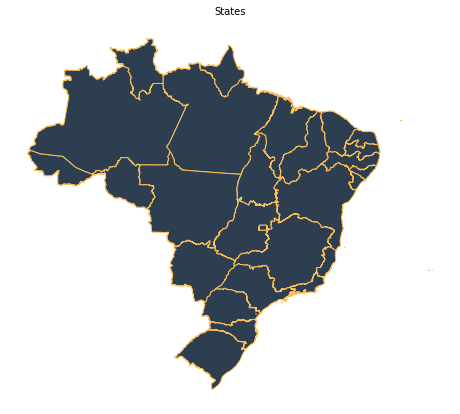

In [63]:
# Plot all Brazilian states
fig, ax = plt.subplots(figsize=(8, 8))

states.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)

ax.set_title("States", fontsize= 10)
ax.axis("off");

In [64]:
data = pd.merge(states, inscritos_por_estado, left_on = 'abbrev_state', right_on = 'UF')
data = gpd.GeoDataFrame(data)

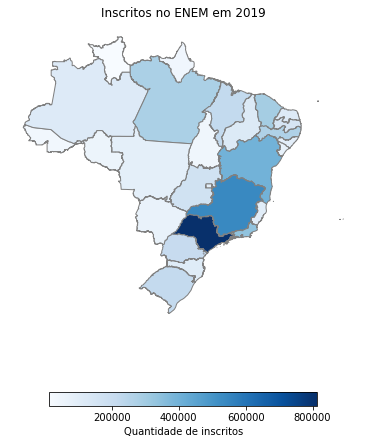

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))

data.plot(
    column="Quantidade de Inscritos",
    cmap="Blues",
    ax=ax,
    legend=True,
    legend_kwds = {
        'label': 'Quantidade de inscritos',
        'orientation': 'horizontal',
        "shrink": 0.6},
    edgecolor = 'gray'
)
ax.set_title("Inscritos no ENEM em 2019")
ax.axis("off");

### Referências

https://www.dataquest.io/blog/python-pandas-databases/

https://pt.wikipedia.org/wiki/SQL

https://aws.amazon.com/pt/relational-database/

https://blog.panoply.io/how-to-read-a-sql-query-into-a-pandas-dataframe

### To learn more about SQL
* [SQLBolt](https://sqlbolt.com/)
* [W3School](https://www.w3schools.com/sql/default.asp)